In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

In [7]:
from wordcloud import WordCloud, STOPWORDS

In [8]:
data = pd.read_csv('Sentiment.csv')

data = data[['text', 'sentiment']]

In [9]:
train, test = train_test_split(data, test_size=0.1)

train = train[train['sentiment'] != 'Neutral'] 

In [10]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']

train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

Positive words


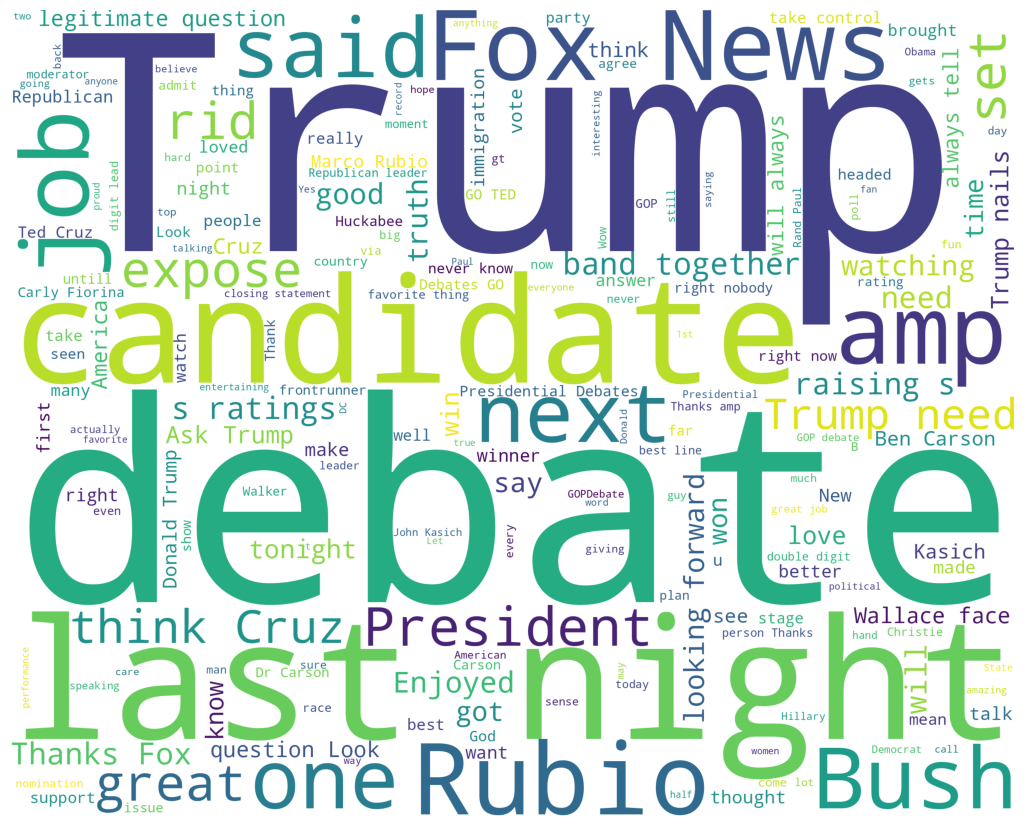

Negative words


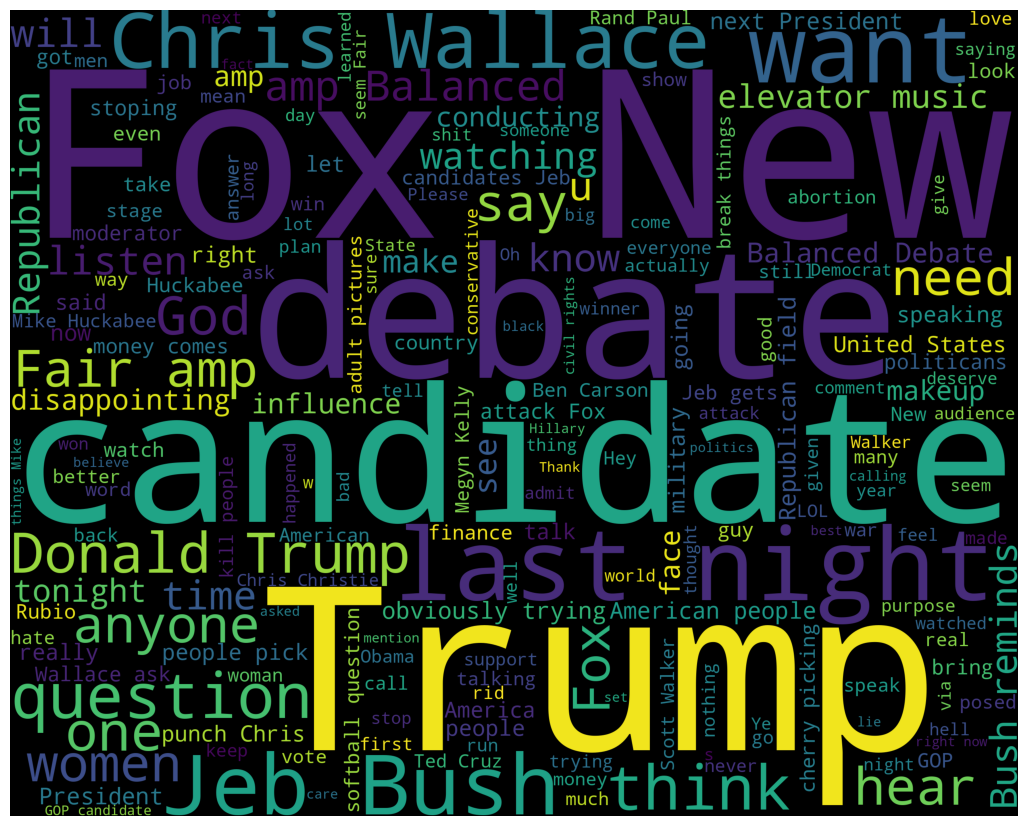

In [11]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)